In [22]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습/9주차 강의/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [23]:
# 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [36]:
# 정규화 확인
print(data.shape)
print(data.min())
print(data.max())
print(data[:5])

(325, 1)
0.0
1.0
[[0.03431412]
 [0.03423395]
 [0.07784815]
 [0.12290548]
 [0.09540608]]


In [24]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [25]:
print('전체 데이터의 크기 :', len(X), len(y))

전체 데이터의 크기 : 313 313


In [26]:
train_size = int(len(y) * 0.7)
train_X = np.array(X[0 : train_size])
train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
test_X = np.array(X[train_size : len(X)])
test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (219, 12, 1) (219, 1)
테스트 데이터의 크기 : (94, 12, 1) (94, 1)


In [34]:
# 4. LSTM 모델
model = tf.keras.Sequential([
    # return_sequences=True: 모든 스텝의 출력을 다음 층으로 전달
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
#    tf.keras.layers.LSTM(32, return_sequences= True),
#    tf.keras.layers.LSTM(16),
#  층을 늘려봤더니 1개 늘릴 때 마다 RMSE가 100씩 늘어남
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(train_X, train_y, epochs=50, batch_size=8, verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0483
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0047
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0049
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041
Epoch 16/50
28/28 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


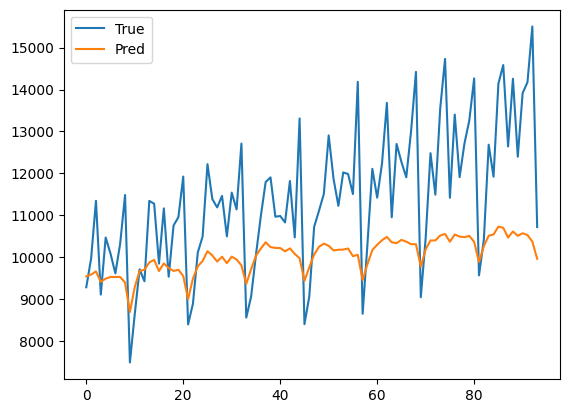

3679726.8288745685
1918.2614078572733


In [33]:
# 5. 예측
pred = model.predict(test_X)
plt.plot(scaler.inverse_transform(test_y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

# MSE를 구하기 위해 원래 크기로 변환
y_test_original = scaler.inverse_transform(test_y)
pred_original = scaler.inverse_transform(pred)
mse = mean_squared_error(y_test_original, pred_original)
print(mse)
rmse = np.sqrt(mse)
print(rmse)